In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Young Stellar Evolution Model Boundary Condition Sensitivity

Exploration of how various boundary conditions affects stellar evolution model results for young stars. Compare with results obtained by Tognelli et al. ([2011, A&A, 533, A109](http://adsabs.harvard.edu/abs/2011A%26A...533A.109T)). Four particular cases are of interest: (1) difference between grey and non-grey, (2) difference between different sets of grey model atmospheres (solar abundances), (3) optical depth where non-grey boundary conditions are attached, and (4) mixing non-grey boundary conditions with incorrect interior opacities.

Define a function to return only the pre-MS section of a given mass track. This is approximate and is based on age for the following test. Above 0.8 Msun, this approximation is inappropriate.

In [2]:
def loadPreMS(filename):
    trk = np.genfromtxt(filename)
    bools = [(5.0e5 < age < 1.0e9) for age in trk[:,0]]
    return np.compress(bools, trk, axis=0)

## Grey vs non-grey

Load tracks where the only difference is the adoption of the grey vs non-grey boundary conditions.

In [3]:
edd_0500 = loadPreMS('files/trk/edd/m0500_GS98_p000_p0_y28_mlt1.884.trk')
edd_0800 = loadPreMS('files/trk/edd/m0800_GS98_p000_p0_y28_mlt1.884.trk')

ks_0500  = loadPreMS('files/trk/ks/m0500_GS98_p000_p0_y28_mlt1.884.trk')
ks_0800  = loadPreMS('files/trk/ks/m0800_GS98_p000_p0_y28_mlt1.884.trk')

phx_0500 = loadPreMS('files/trk/m0500_GS98_p000_p0_y28_mlt1.884.trk')
phx_0800 = loadPreMS('files/trk/m0800_GS98_p000_p0_y28_mlt1.884.trk')

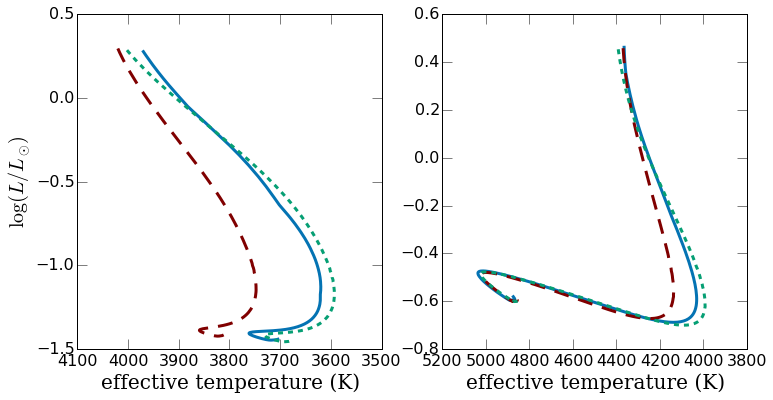

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(12.0, 6.0), sharey=False)

ax[0].set_xlim(4100., 3500.)
ax[1].set_xlim(5200., 3800.)

ax[0].set_ylabel('$\\log(L/L_{\\odot})$', fontsize=20.)
for axis in ax:
    axis.set_xlabel('effective temperature (K)', fontsize=20., family='serif')
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)

# M = 0.5 Msun HRD
ax[0].plot(10**phx_0500[:,1], phx_0500[:,3], '-', lw=3, c='#0473B3')
ax[0].plot(10**edd_0500[:,1], edd_0500[:,3], '-', lw=3, dashes=(15., 10.), c='#800000')
ax[0].plot(10**ks_0500[:,1],  ks_0500[:,3],  '-', lw=3, dashes=(5., 5.), c='#069F74')

# M = 0.8 Msun HRD
ax[1].plot(10**phx_0800[:,1], phx_0800[:,3], '-', lw=3, c='#0473B3')
ax[1].plot(10**edd_0800[:,1], edd_0800[:,3], '-', lw=3, dashes=(15., 10.), c='#800000')
ax[1].plot(10**ks_0800[:,1],  ks_0800[:,3],  '-', lw=3, dashes=(5., 5.), c='#069F74')

Now when solar calibration is taken into account

In [5]:
ks_0500  = loadPreMS('files/trk/ks/m0500_GS98_p000_p0_y28_mlt2.139.trk')
ks_0800  = loadPreMS('files/trk/ks/m0800_GS98_p000_p0_y28_mlt2.139.trk')

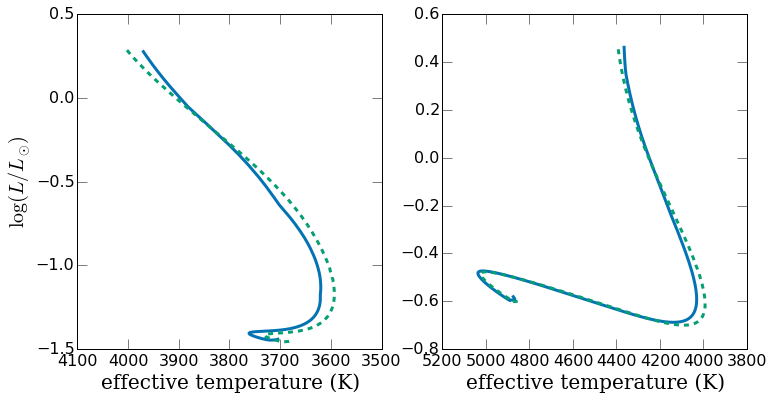

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(12.0, 6.0), sharey=False)

ax[0].set_xlim(4100., 3500.)
ax[1].set_xlim(5200., 3800.)

ax[0].set_ylabel('$\\log(L/L_{\\odot})$', fontsize=20.)
for axis in ax:
    axis.set_xlabel('effective temperature (K)', fontsize=20., family='serif')
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)

# M = 0.5 Msun HRD
ax[0].plot(10**phx_0500[:,1], phx_0500[:,3], '-', lw=3, c='#0473B3')
ax[0].plot(10**ks_0500[:,1],  ks_0500[:,3],  '-', lw=3, dashes=(5., 5.), c='#069F74')

# M = 0.8 Msun HRD
ax[1].plot(10**phx_0800[:,1], phx_0800[:,3], '-', lw=3, c='#0473B3')
ax[1].plot(10**ks_0800[:,1],  ks_0800[:,3],  '-', lw=3, dashes=(5., 5.), c='#069F74')

Analysis

## Solar Abundance in Grey Atmosphere

Comparing GS98, GAS07, and AGSS09.

In [7]:
# All BCs attached at tau=10, trimmed to be only pre-MS to ZAMS (approx)
gs98_0100  = loadPreMS('files/trk/m0100_GS98_p000_p0_y28_mlt1.884.trk')
gs98_0500  = loadPreMS('files/trk/m0500_GS98_p000_p0_y28_mlt1.884.trk')
gs98_0800  = loadPreMS('files/trk/m0800_GS98_p000_p0_y28_mlt1.884.trk')

gas07_0100 = loadPreMS('files/trk/m0100_GAS07_p000_p0_y26_mlt2.040.trk')
gas07_0500 = loadPreMS('files/trk/m0500_GAS07_p000_p0_y26_mlt2.040.trk')
gas07_0800 = loadPreMS('files/trk/m0800_GAS07_p000_p0_y26_mlt2.040.trk')

ags09_0100 = loadPreMS('files/trk/m0100_AGSS09_p000_p0_y27_mlt1.991.trk')
ags09_0500 = loadPreMS('files/trk/m0500_AGSS09_p000_p0_y27_mlt1.991.trk')
ags09_0800 = loadPreMS('files/trk/m0800_AGSS09_p000_p0_y27_mlt1.991.trk')

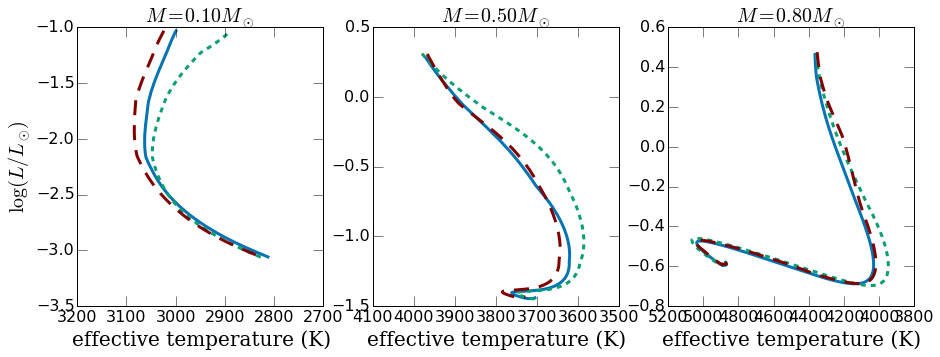

In [21]:
fig, ax = plt.subplots(1, 3, figsize=(15.0, 5.0), sharey=False)

ax[0].set_xlim(3200., 2700.)
ax[1].set_xlim(4100., 3500.)
ax[2].set_xlim(5200., 3800.)

ax[0].set_ylabel('$\\log(L/L_{\\odot})$', fontsize=20.)
for axis in ax:
    axis.set_xlabel('effective temperature (K)', fontsize=20., family='serif')
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)

# M = 0.5 Msun HRD
ax[0].set_title('$M = 0.10 M_{\\odot}$', fontsize=20.)
ax[0].plot(10**gs98_0100[:,1],  gs98_0100[:,3],  '-', lw=3, c='#0473B3')
ax[0].plot(10**gas07_0100[:,1], gas07_0100[:,3], '-', lw=3, dashes=(5., 5.), c='#069F74')
ax[0].plot(10**ags09_0100[:,1], ags09_0100[:,3], '-', lw=3, dashes=(15., 10.), c='#800000')
    
# M = 0.5 Msun HRD
ax[1].set_title('$M = 0.50 M_{\\odot}$', fontsize=20.)
ax[1].plot(10**gs98_0500[:,1],  gs98_0500[:,3],  '-', lw=3, c='#0473B3')
ax[1].plot(10**gas07_0500[:,1], gas07_0500[:,3], '-', lw=3, dashes=(5., 5.), c='#069F74')
ax[1].plot(10**ags09_0500[:,1], ags09_0500[:,3], '-', lw=3, dashes=(15., 10.), c='#800000')

# M = 0.8 Msun HRD
ax[2].set_title('$M = 0.80 M_{\\odot}$', fontsize=20.)
ax[2].plot(10**gs98_0800[:,1],  gs98_0800[:,3],  '-', lw=3, c='#0473B3')
ax[2].plot(10**gas07_0800[:,1], gas07_0800[:,3], '-', lw=3, dashes=(5., 5.), c='#069F74')
ax[2].plot(10**ags09_0800[:,1], ags09_0800[:,3], '-', lw=3, dashes=(15., 10.), c='#800000')

It's clear from the above figures that altering the solar abundance distribution affects the morphology of single star stellar evolution mass tracks. The divergence of mass tracks computed with the GAS07 and AGSS09 solar abundances is curious. Both have helium and heavy element abundances lower than is present in the GS98 track and solar-calibrated mixing lengths that are larger than in the case of the GS98 abundances. In general, the AGSS09 mass tracks mirror the GS98 mass tracks, with the exception of slight offsets that are present throughout fully convective evolution. Some discrepancies occur near where models develop a radiative core below 0.80 Msun. 

The figures show that, at young ages, the GAS07 mass tracks are cooler than the GS98 and AGSS09 tracks, often by about 50 K, which is approaching a significant fraction of typical observational uncertainties (~ 70 – 100 K). Why it is that the GAS07 tracks and AGSS09 tracks show different offsets from the GS98 models is unclear. One does not that, at least in the case of lower mass stars, the GAS07 and AGSS09 tracks possess similar morphologies (notably at 0.5 Msun). It may be that the GS98 model atmospheres are not producing appropriate thermal structures at depth. There is some evidence for this based on comparing thermal structures from PHOENIX BT-Settl, NextGen, and MARCS atmospheres to the custom NextGen atmospheres computed for the original Dartmouth model release. 

## Boundary Condition Fit Depth

Using MARCS model atmospheres with GAS07 solar abundances.

In [9]:
t001_0500 = loadPreMS('files/trk/m0500_GAS07_p000_p0_y26_mlt1.911.trk')
t001_0800 = loadPreMS('files/trk/m0800_GAS07_p000_p0_y26_mlt1.911.trk')

t010_0500 = loadPreMS('files/trk/m0500_GAS07_p000_p0_y26_mlt2.040.trk')
t010_0800 = loadPreMS('files/trk/m0800_GAS07_p000_p0_y26_mlt2.040.trk')

t050_0500 = loadPreMS('files/trk/m0500_GAS07_p000_p0_y26_mlt2.202.trk')
t050_0800 = loadPreMS('files/trk/m0800_GAS07_p000_p0_y26_mlt2.202.trk')

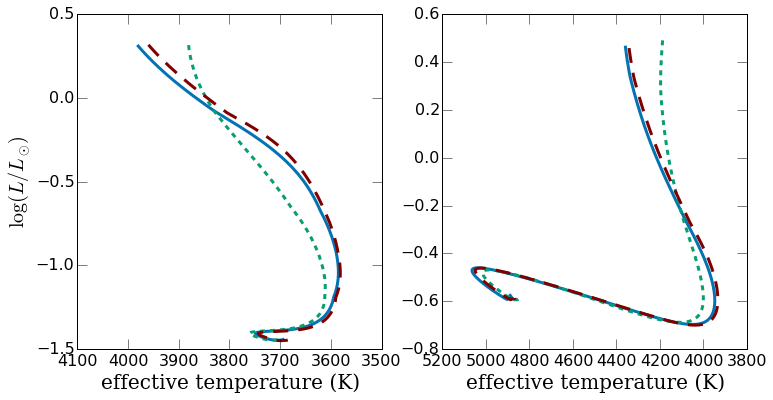

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12.0, 6.0), sharey=False)

ax[0].set_xlim(4100., 3500.)
ax[1].set_xlim(5200., 3800.)

ax[0].set_ylabel('$\\log(L/L_{\\odot})$', fontsize=20.)
for axis in ax:
    axis.set_xlabel('effective temperature (K)', fontsize=20., family='serif')
    axis.tick_params(which='major', axis='both', length=10., labelsize=16.)

# M = 0.5 Msun HRD
ax[0].plot(10**t010_0500[:,1], t010_0500[:,3], '-', lw=3, c='#0473B3')
ax[0].plot(10**t001_0500[:,1], t001_0500[:,3], '-', lw=3, dashes=(5., 5.), c='#069F74')
ax[0].plot(10**t050_0500[:,1], t050_0500[:,3], '-', lw=3, dashes=(15., 10.), c='#800000')

# M = 0.8 Msun HRD
ax[1].plot(10**t010_0800[:,1], t010_0800[:,3], '-', lw=3, c='#0473B3')
ax[1].plot(10**t001_0800[:,1], t001_0800[:,3], '-', lw=3, dashes=(5., 5.), c='#069F74')
ax[1].plot(10**t050_0800[:,1], t050_0800[:,3], '-', lw=3, dashes=(15., 10.), c='#800000')